In [66]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [67]:
df = pd.read_csv('ml-100k/u.data', sep = '\t', names = ['user_id','item_id','rating','timestamp'])

In [68]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [69]:
df['user_id'].nunique()

943

In [70]:
df['item_id'].nunique()

1682

In [71]:
movies_title = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1',header=None)


In [72]:
movies_title = movies_title[[0,1]]

In [73]:
movies_title.columns = ['item_id','title']

In [74]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [75]:
df = pd.merge(df,movies_title, on = 'item_id')

In [76]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [77]:
df.shape

(100000, 5)

In [78]:
len(df.columns)

5

## sorting movies on the basis of rating

In [79]:
df.groupby('title')


In [80]:
df.groupby('title').mean()['rating']

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [83]:
df.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

## To check how many users give rating to a single movie

In [84]:
df.groupby('title').count()['item_id']

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: item_id, Length: 1664, dtype: int64

In [86]:
df.groupby('title').count()['item_id'].sort_values(ascending = False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: item_id, dtype: int64

In [88]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [89]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [91]:
ratings['numOfratings'] = df.groupby('title').count()['rating']

In [92]:
ratings.head()

,rating,numOfratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [94]:
ratings.sort_values(by = 'rating', ascending=False)

,rating,numOfratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

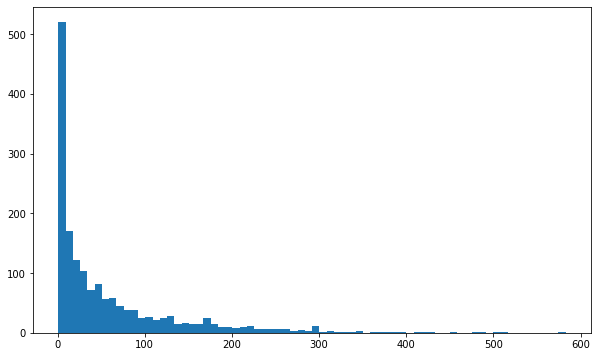

In [99]:
plt.figure(figsize = (10,6))
plt.hist(ratings['numOfratings'], bins = 70)
plt.show()

In [100]:
plt.hist?

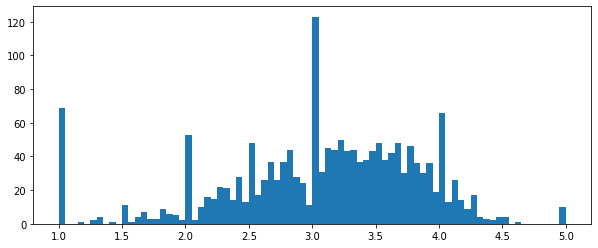

In [102]:
plt.figure(figsize = (10,4))
plt.hist(ratings['rating'], bins = 80)
plt.show()

In [103]:
sns.jointplot?

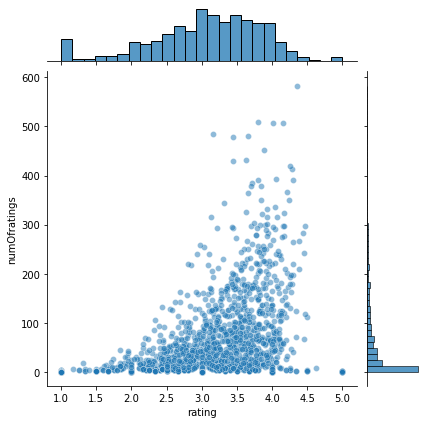

In [107]:
sns.jointplot(x = 'rating', y = 'numOfratings', data = ratings, alpha = 0.5)
plt.show()

## Create the Recommendation System
- Create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [108]:
df.pivot_table?

In [110]:
movie_mat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [114]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [118]:
ratings.sort_values(by = 'numOfratings',ascending = False)

,rating,numOfratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [120]:
star_wars_user_rating = movie_mat['Star Wars (1977)']

In [122]:
star_wars_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [123]:
similar_to_star_wars = movie_mat.corrwith(star_wars_user_rating)

In [125]:
similar_to_star_wars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [129]:
corr_with_star_wars = pd.DataFrame(similar_to_star_wars, columns = ['correlation'])

In [131]:
corr_with_star_wars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [138]:
corr_with_star_wars.isna().sum()

correlation    254
dtype: int64

In [144]:
corr_with_star_wars.dropna(inplace = True)

In [146]:
similar_to_star_wars.isnull().sum()

254

In [148]:
corr_with_star_wars.sort_values(by = 'correlation', ascending = False).head()

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [158]:
star_wars = corr_with_star_wars.join(ratings['numOfratings'])

In [159]:
star_wars.head()

,correlation,numOfratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [165]:
Star_wars=star_wars[star_wars['numOfratings']>100]

In [169]:
Star_wars.sort_values(by = 'numOfratings', ascending = False)

,correlation,numOfratings
title,,
Star Wars (1977),1.000000,583
Contact (1997),0.134962,509
Fargo (1996),0.044415,508
Return of the Jedi (1983),0.672556,507
Liar Liar (1997),0.150292,485
...,...,...
Miracle on 34th Street (1994),0.310921,101
Pinocchio (1940),0.347868,101
Basic Instinct (1992),0.037229,101


## Prediction Function

In [183]:
def predict_movies(movie_name):
    similar_movies = movie_mat.corrwith(movie_mat['movie_name'])
    corr_with_movie = pd.DataFrame(similar_movies, columns = ['correlation'])
    corr_with_movie.dropna()
    corr_with_movie.join(ratings['numOfratings'])
    prediction = corr_with_movie[corr_with_movie['numOfratings']>100].sort_values(by = 'correlation', ascending = False)
    return prediction